In [1]:
import MinMax as MM
import time
import numpy as np
from matplotlib import pyplot as plt

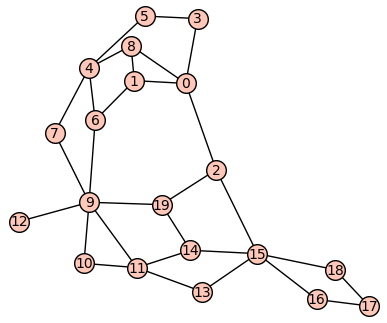

In [2]:
Nt = {
    0:[1,2,3],
    1:[6],
    2:[15],
    4:[5,6,7],
    8:[0,4,1],
    5:[3],
    9:[6,7,10,11,12],
    10:[11],
    11:[13,14],
    13:[15],
    14:[15],
    15:[16],
    16:[17],
    17:[18],
    18:[15],
    19:[9,2,14]
}

G = Graph(Nt)
G.show()

In [3]:
#make a failure function
def func(H):
    #the graph has failed if its size is less than 6
    return not (H.order() < 6)

In [4]:
#calculate how many subrapghs we need to check
k = var('k')
n = G.order()
Tots = sum(binomial(n,k),k,0,n-1)
print(f"Checking {Tots} SubGraphs In totall for this component of order {n}\n")

start = time.time()
MinMax = MM.FailTest(func,G)
end = time.time()

print (f"\nTime elapsed for Algo:  { (end - start)/60 } minutes")

Checking 1048575 SubGraphs In totall for this component of order 20

Component Not Failed already
Gening Pairs
Finished Gening pairs
Checking 1 pairs
Gening Pairs
Finished Gening pairs
Checking 2 pairs
Gening Pairs
Finished Gening pairs
Checking 3 pairs
Gening Pairs
Finished Gening pairs
Checking 4 pairs
Gening Pairs
Finished Gening pairs
Checking 5 pairs
Gening Pairs
Finished Gening pairs
Checking 6 pairs
Gening Pairs
Finished Gening pairs
Checking 7 pairs
Gening Pairs
Finished Gening pairs
Checking 8 pairs
Gening Pairs
Finished Gening pairs
Checking 9 pairs
Gening Pairs
Finished Gening pairs
Checking 10 pairs
Gening Pairs
Finished Gening pairs
Checking 11 pairs
Gening Pairs
Finished Gening pairs
Checking 12 pairs
Gening Pairs
Finished Gening pairs
Checking 13 pairs
Gening Pairs
Finished Gening pairs
Checking 14 pairs
Gening Pairs
Finished Gening pairs
Checking 15 pairs
Found Minimum set for component
Gening Pairs
Finished Gening pairs
Checking 16 pairs
Gening Pairs
Finished Gening pa

In [5]:
#make a range for the number of vertices
N = range(0,G.order()+1)
Nlist = list(N)

#define some function we might want to test out
def Ord(H):
    return not (H.order() < 5)
def ChromNum(H):
    return not (H.chromatic_number() < 5)
def ChromInd(H):
    return not (H.chromatic_index() < 5)

#time the functions for variouse vertices in milliseconds
tabdata = [
    ["Num.of Verts (ms)","Ord(H) <5 (ms)","Chrom(H) <5 (ms)","ChromIn(H) <5 (ms)"]
]
for i in N[1:]:
    #make a test set
    TestSet = Nlist[:i]
    
    #make the subgraph
    H = G.subgraph(TestSet)
    
    #time finding the order state
    start = time.time()
    MinMax = MM.FailTestNoPrint(Ord,H)
    end = time.time()
    OrdTime = round((end - start)*1000,4)
    
    #time finding the chromatic number state
    start = time.time()
    MinMax = MM.FailTestNoPrint(ChromNum,H)
    end = time.time()
    ChromNTime = round((end - start)*1000,4)
    
    #time finding the chromatic index state
    start = time.time()
    MinMax = MM.FailTestNoPrint(ChromInd,H)
    end = time.time()
    ChromITime = round((end - start)*1000,4)
    
    row = [len(TestSet),OrdTime,ChromNTime,ChromITime]
    tabdata.append(row)
    print(f"Finished with n={len(TestSet)}")

Finished with n=1
Finished with n=2
Finished with n=3
Finished with n=4
Finished with n=5
Finished with n=6
Finished with n=7
Finished with n=8
Finished with n=9
Finished with n=10
Finished with n=11
Finished with n=12
Finished with n=13
Finished with n=14
Finished with n=15
Finished with n=16
Finished with n=17
Finished with n=18
Finished with n=19
Finished with n=20


In [6]:
TB = table(tabdata,header_row=True,align="right")
TB

Num.of Verts (ms),Ord(H) <5 (ms),Chrom(H) <5 (ms),ChromIn(H) <5 (ms)
,,,
,,,
,,,
,,,
,,,
,,,
,,,
,,,
,,,
,,,


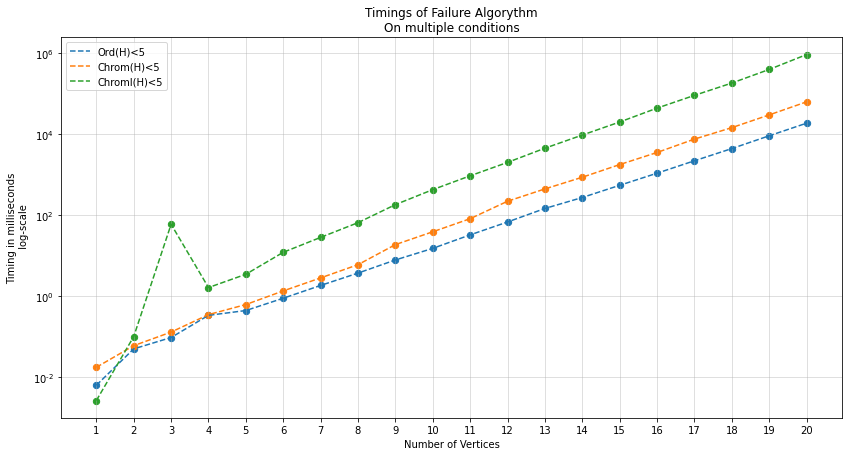

In [7]:
Pdata = np.transpose(np.array(tabdata[1:]))

X = Pdata[0]

Y_ord = Pdata[1]
Y_chromN = Pdata[2]
Y_chromI = Pdata[3]

fig, axs = plt.subplots(figsize=(14,7))

axs.plot(X,Y_ord,'--',label="Ord(H)<5")
axs.scatter(X,Y_ord,s=40)
axs.plot(X,Y_chromN,'--',label="Chrom(H)<5")
axs.scatter(X,Y_chromN,s=40)
axs.plot(X,Y_chromI,'--',label="ChromI(H)<5")
axs.scatter(X,Y_chromI,s=40)
axs.grid(alpha=0.5)
axs.set_yscale('log')

axs.set_title("Timings of Failure Algorythm\nOn multiple conditions")

axs.set_ylabel("Timing in milliseconds\n log-scale")
axs.set_xlabel("Number of Vertices")
axs.set_xticks(X)

axs.legend()

plt.show()